In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Hospitality minds dataset.csv')
df.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,...,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,...,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,...,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,...,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,...,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [3]:
df.shape

(90000, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [5]:
df.describe()

,Year,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Adults,Children,Kids,Repeated Guest,Prev Cancel,History,Booking Changes,Waiting List,Per Day Charges,Parking at premises,Physical Challenged,Cancellation,Booking Done
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,89998.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,2016.168711,27.122456,16.408356,0.908433,2.526967,1.857967,0.104513,0.009667,0.031300,0.058300,0.138289,0.228178,1.306944,101.745815,0.063956,0.623367,0.373722,107.271256
std,0.708918,13.589391,9.083017,1.002316,1.851936,0.525628,0.399714,0.099309,0.174128,0.430933,1.456766,0.658184,13.365843,47.853487,0.245265,0.817632,0.483794,111.192091
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,19.000000
50%,2016.000000,27.000000,17.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000
75%,2017.000000,38.000000,25.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000,163.000000
max,2017.000000,53.000000,31.000000,14.000000,35.000000,26.000000,3.000000,2.000000,1.000000,26.000000,66.000000,16.000000,391.000000,437.000000,2.000000,5.000000,1.000000,629.000000


In [6]:
# Lets check no. of numerical & categorical columns
print('No. of Categorical Columns:', df.select_dtypes(include='object').shape[1])
print('No. of Numerical Columns:',df.describe().shape[1])

No. of Categorical Columns: 11
No. of Numerical Columns: 18


In [7]:
# lets check unique values in all categorical columns

for i in df.describe(include ='object'):
    if(i != 'Reservation Date'):
        print(f'{i} count: {df[i].nunique()}')
        print(df[i].unique())
        print('-'*50)

Type of Hotel count: 2
['Motel' 'Villa']
--------------------------------------------------
Month count: 12
['July' 'August' 'April' 'June' 'February' 'May' 'September' 'December'
 'March' 'January' 'November' 'October']
--------------------------------------------------
Meal count: 5
['Bed & Breakfast' 'Breakfast & Dinner' 'Room Only'
 'Breakfast, Lunch & Dinner' 'All Inclusive']
--------------------------------------------------
Booking Payment count: 3
['No Deposit' 'Non Refund' 'Refundable']
--------------------------------------------------
Country count: 107
['PRT' 'ESP' 'FRA' 'AUT' 'DEU' 'GBR' 'BRA' 'NLD' 'CN' 'ITA' 'IRL' 'RUS'
 'POL' 'USA' 'LBN' 'UKR' 'KOR' 'BEL' 'DNK' 'CHE' nan 'ISR' 'MYS' 'NOR'
 'GRC' 'AUS' 'SWE' 'TUR' 'TUN' 'AGO' 'NZL' 'FIN' 'HRV' 'HUN' 'EST' 'LUX'
 'TWN' 'BGD' 'PHL' 'CHL' 'CMR' 'MDV' 'CHN' 'JPN' 'ZAF' 'IRN' 'HKG' 'ROU'
 'EGY' 'DZA' 'CZE' 'SVK' 'IND' 'LVA' 'NGA' 'ARE' 'IDN' 'SGP' 'ARG' 'LTU'
 'IRQ' 'MEX' 'VEN' 'JOR' 'MAR' 'AND' 'SVN' 'SAU' 'PER' 'JEY' 'CYP' 

In [8]:
df.isnull().sum()

Type of Hotel            0
Year                     0
Month                    0
Reservation Date         0
Arrival week             0
Arrival Date             0
Weekend Stays            0
Weekday Stays            0
Meal                     0
Booking Payment          0
Adults                   0
Children                 2
Kids                     0
Country                371
Booking Type             0
Repeated Guest           0
Prev Cancel              0
History                  0
Reserved Room            0
Assigned Room            0
Booking Changes          0
Waiting List             0
Customer                 0
Per Day Charges          0
Parking at premises      0
Physical Challenged      0
Reservation Status       0
Cancellation             0
Booking Done             0
dtype: int64

1. Column country has 371 NULL values which is negligible of total column so the rows can be removed  

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

Type of Hotel          0
Year                   0
Month                  0
Reservation Date       0
Arrival week           0
Arrival Date           0
Weekend Stays          0
Weekday Stays          0
Meal                   0
Booking Payment        0
Adults                 0
Children               0
Kids                   0
Country                0
Booking Type           0
Repeated Guest         0
Prev Cancel            0
History                0
Reserved Room          0
Assigned Room          0
Booking Changes        0
Waiting List           0
Customer               0
Per Day Charges        0
Parking at premises    0
Physical Challenged    0
Reservation Status     0
Cancellation           0
Booking Done           0
dtype: int64

<Figure size 500x500 with 0 Axes>

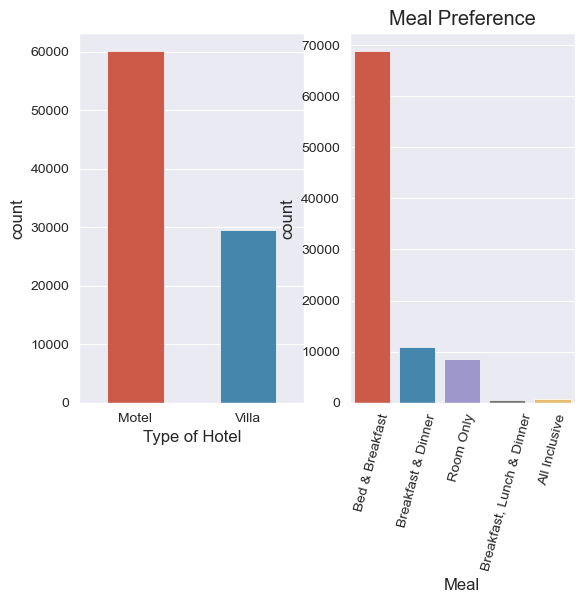

In [12]:
plt.figure(figsize =(5,5))
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Type of Hotel' , width =0.5, data=df, hue='Type of Hotel',ax=axes[0])
plt.title('Hotel Type')
sns.countplot(x='Meal' , data=df, hue='Meal',ax=axes[1])
plt.xticks(rotation = 75)
plt.title('Meal Preference')
plt.show()

Highest percentage of people chose Motel over villa and high preference to Bed and Breakfast

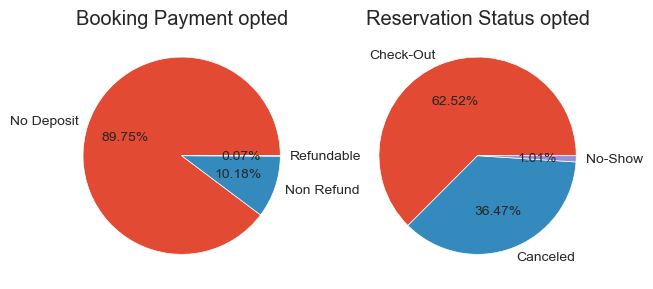

In [14]:
plt.figure(figsize =(7,7))
pay_type=[]
pay_type_count=[]
for i in df['Booking Payment'].unique():
    pay_type.append(i)
    pay_type_count.append(len(df[df['Booking Payment']==pay_type[len(pay_type)-1]]))
check_in=[]
check_in_c=[]
for i in df['Reservation Status'].unique():
    check_in.append(i)
    check_in_c.append(len(df[df['Reservation Status']==check_in[len(check_in)-1]]))
plt.subplot(1,2,1)    
plt.pie(pay_type_count,labels=pay_type, autopct='%.2f%%')                  
plt.title('Booking Payment opted')
plt.subplot(1,2,2)    
plt.pie(check_in_c,labels=check_in,autopct='%.2f%%')                  
plt.title('Reservation Status opted')
plt.show()

1.Highly booked Hotel was with No deposite followed by Non Refundable(advanced booked). People chose a hotel with refundable
payment is negligible 
2. High change that booked rooms are checked-in by people and one third were cancelled

Text(0.5, 1.0, 'Booking Month')

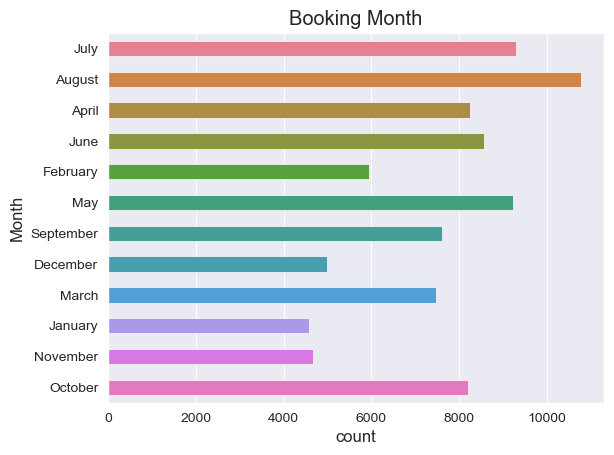

In [16]:
ax=sns.countplot(y='Month' , width =0.5, data=df, hue='Month')

plt.title('Booking Month')

More rooms are occupied in the second Quater of year than .

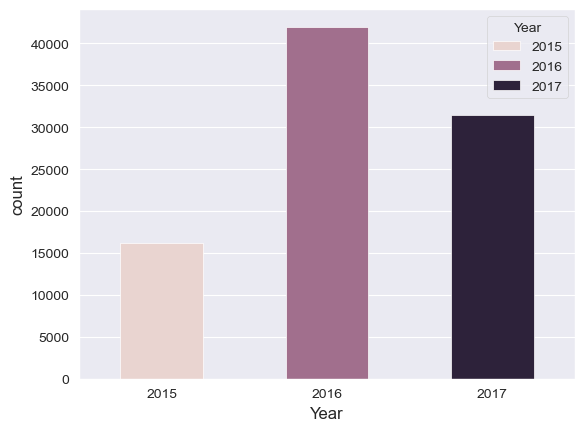

In [18]:
sns.countplot(x=df['Year'],width=0.5, hue=df['Year'])
plt.show()

## Lets begin with Bivariate analysis

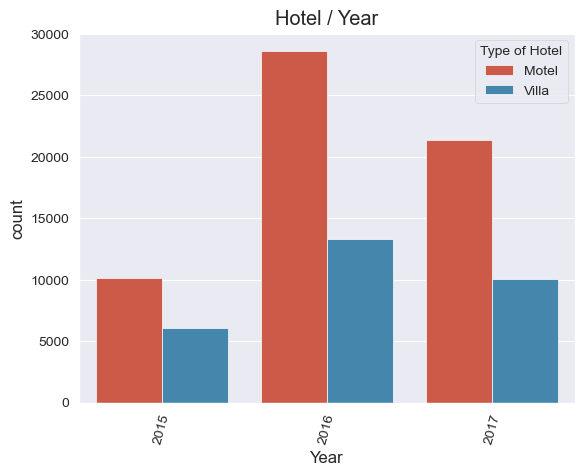

In [20]:
sns.countplot(x='Year' , data=df, hue='Type of Hotel')
plt.xticks(rotation = 75)
plt.title('Hotel / Year')
plt.show()

<Axes: xlabel='Year'>

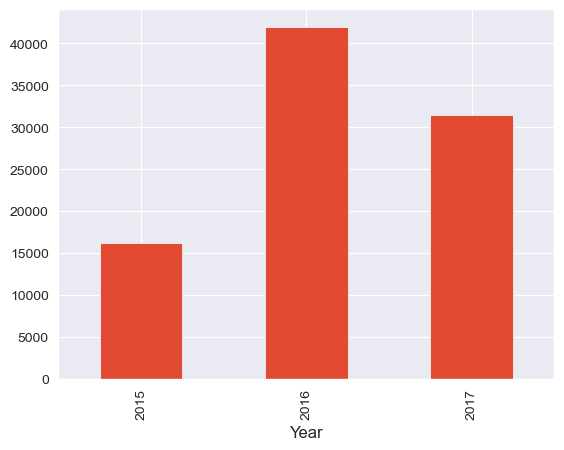

In [21]:
df.groupby(df.Year)['Type of Hotel'].count().plot(kind ='bar')

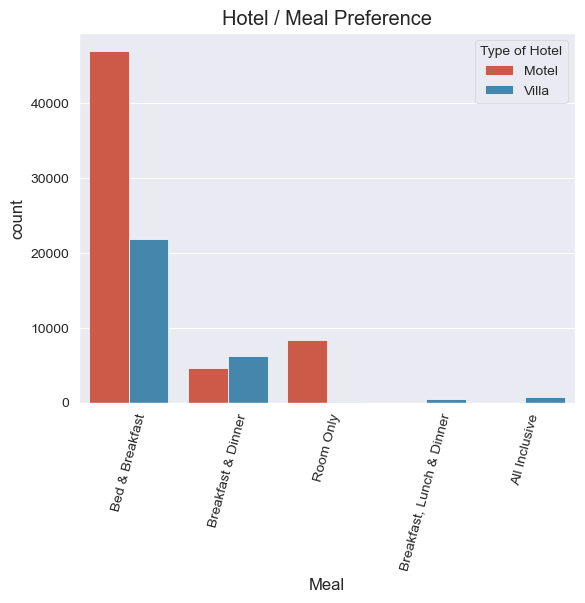

In [22]:
sns.countplot(x='Meal' , data=df, hue='Type of Hotel')
plt.xticks(rotation = 75)
plt.title('Hotel / Meal Preference')
plt.show()

* From the above chart we can conclude that Rooms along with breakfast is common among Hotel types
* whereas few people who chose Villa expect all facility inclusive. 

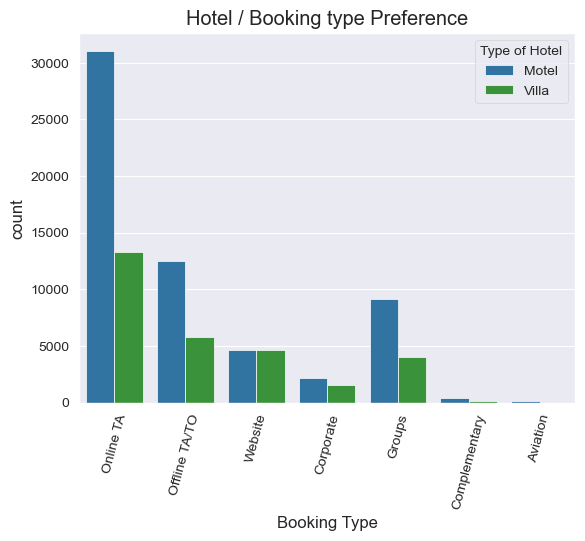

In [24]:
palette = {
    'Motel': 'tab:blue',
    'Villa': 'tab:green',
}
sns.countplot(x='Booking Type' , data=df, hue='Type of Hotel',palette=palette)
plt.xticks(rotation = 75)
plt.title('Hotel / Booking type Preference')
plt.show()

* Online Transaction considered to be most preferred way of chossing a Hotel followed by Offline enquiries, website search and so on.

In [26]:
df['Total_cost_for_stay']=df['Per Day Charges']*df['Weekend Stays']*df['Weekday Stays']
df['Total_cost_for_stay']

0        792.0
1        900.0
2         44.0
3          0.0
4          0.0
         ...  
89995     91.0
89996      0.0
89997    650.0
89998    568.0
89999    170.0
Name: Total_cost_for_stay, Length: 89627, dtype: float64

### Total Revenue of Hotels in Given year 2015 - 2017

In [28]:
df['Total_cost_for_stay'].groupby([df['Type of Hotel'],df['Year']]).sum(['Total_cost_for_stay']).astype(float)

Type of Hotel  Year
Motel          2015    1373212.00
               2016    5908012.08
               2017    5114137.00
Villa          2015    3199799.00
               2016    6628580.00
               2017    6999026.00
Name: Total_cost_for_stay, dtype: float64

<Axes: xlabel='Type of Hotel', ylabel='Total_cost_for_stay'>

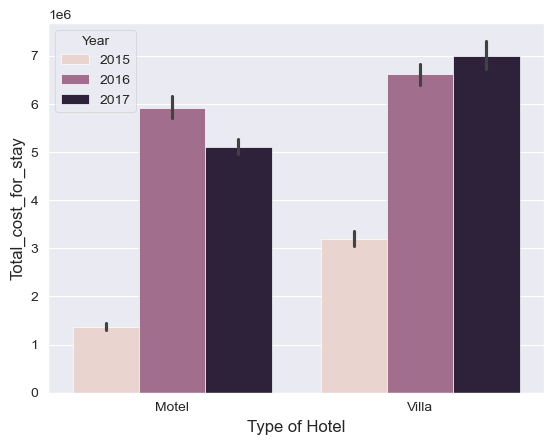

In [29]:
sns.barplot(x='Type of Hotel' , y='Total_cost_for_stay',data=df,hue='Year',estimator='sum')

* Revenue by Motels
    * 2015  -->  1373212.00    *  2016 -->   5908012.08
  *   201 -->    5114137.
* Revenue by Villa  
    * 2015  -->  3199799.00
   *  2016 -->   6628580.00
  *   2017-->    6999026.0000

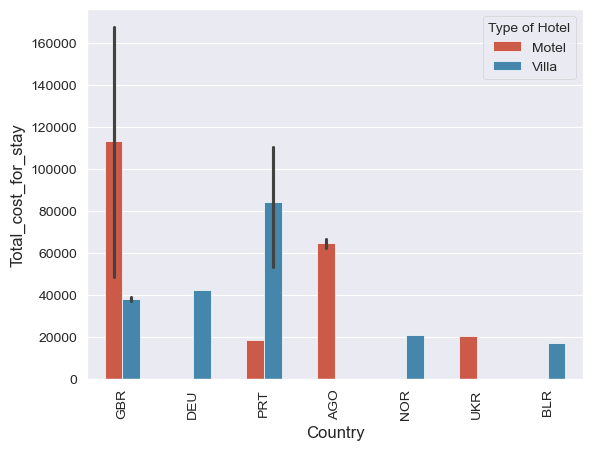

In [31]:
sns.barplot(x='Country' , y='Total_cost_for_stay',data=df.nlargest(15, 'Total_cost_for_stay'),hue='Type of Hotel',estimator = 'sum',width=0.5)
plt.xticks(rotation = 90)
plt.show()

In [32]:
df.nlargest(15, 'Total_cost_for_stay')

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done,Total_cost_for_stay
26614,Motel,2016,September,10-09-2016,39,22,12,35,Bed & Breakfast,No Deposit,...,0,0,Transient,133.00,0,1,Check-Out,0,98,55860.00
516,Villa,2017,August,10-09-2017,33,15,9,20,Breakfast & Dinner,No Deposit,...,1,0,Transient,236.00,0,1,Check-Out,0,177,42480.00
41758,Motel,2016,September,09-11-2016,39,22,13,34,Room Only,No Deposit,...,10,0,Transient,93.34,0,2,Check-Out,0,164,41256.28
47257,Villa,2017,August,10-11-2016,33,19,9,20,Breakfast & Dinner,No Deposit,...,0,0,Transient,204.00,0,0,Canceled,1,240,36720.00
53516,Motel,2016,October,24-09-2016,41,6,8,20,Bed & Breakfast,No Deposit,...,0,0,Transient,208.00,0,1,Canceled,1,15,33280.00
55442,Motel,2017,January,07-12-2016,3,14,8,22,Bed & Breakfast,No Deposit,...,0,0,Transient,177.00,0,0,Canceled,1,19,31152.00
85584,Villa,2017,July,18-06-2017,29,14,5,15,Breakfast & Dinner,No Deposit,...,0,0,Transient,398.00,0,0,Canceled,1,45,29850.00
9380,Villa,2017,July,06-03-2017,30,29,8,10,Bed & Breakfast,No Deposit,...,0,0,Transient,261.00,0,0,Canceled,1,144,20880.00
37157,Motel,2016,December,22-11-2016,50,5,8,22,Bed & Breakfast,No Deposit,...,0,0,Transient,116.00,0,0,Canceled,1,28,20416.00
57976,Villa,2017,January,17-03-2017,2,10,14,33,Bed & Breakfast,No Deposit,...,0,10,Transient,42.00,0,3,Check-Out,0,107,19404.00


* These are the Top 15 booking based on the total amount spent for a single stay 

### Rooms booking with children

In [35]:
df['with_children']=df['Children'].apply(lambda x : 'Adults With Children' if x>0 else 'Only Adults')

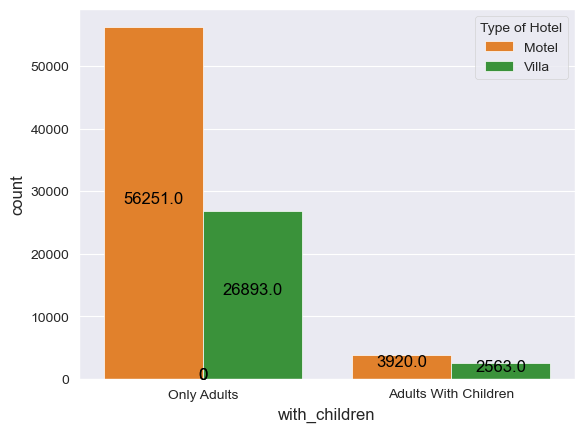

In [36]:
palette = {
    'Motel': 'tab:Orange',
    'Villa': 'tab:green',
}
ax=sns.countplot(x='with_children', data=df,hue='Type of Hotel',palette=palette)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='baseline', fontsize=12, color='Black')

plt.show()

* Overall the rooms of the selected Hotels are occupied by Adults
* Families with Children are significantly less

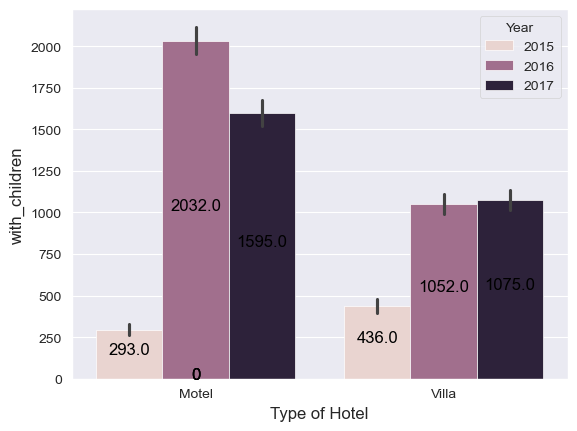

In [38]:
df['with_children']=df['Children'].apply(lambda x : 1 if x>0 else 0)
palette = {
    'Only Adults': 'tab:Orange',
    'Adults With Children': 'tab:green',
}
ax=sns.barplot(x='Type of Hotel' , y='with_children',data=df,hue='Year',estimator='sum')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='baseline', fontsize=12, color='Black')

plt.show()

* Families with children stay is high in 2016 compared to other years 

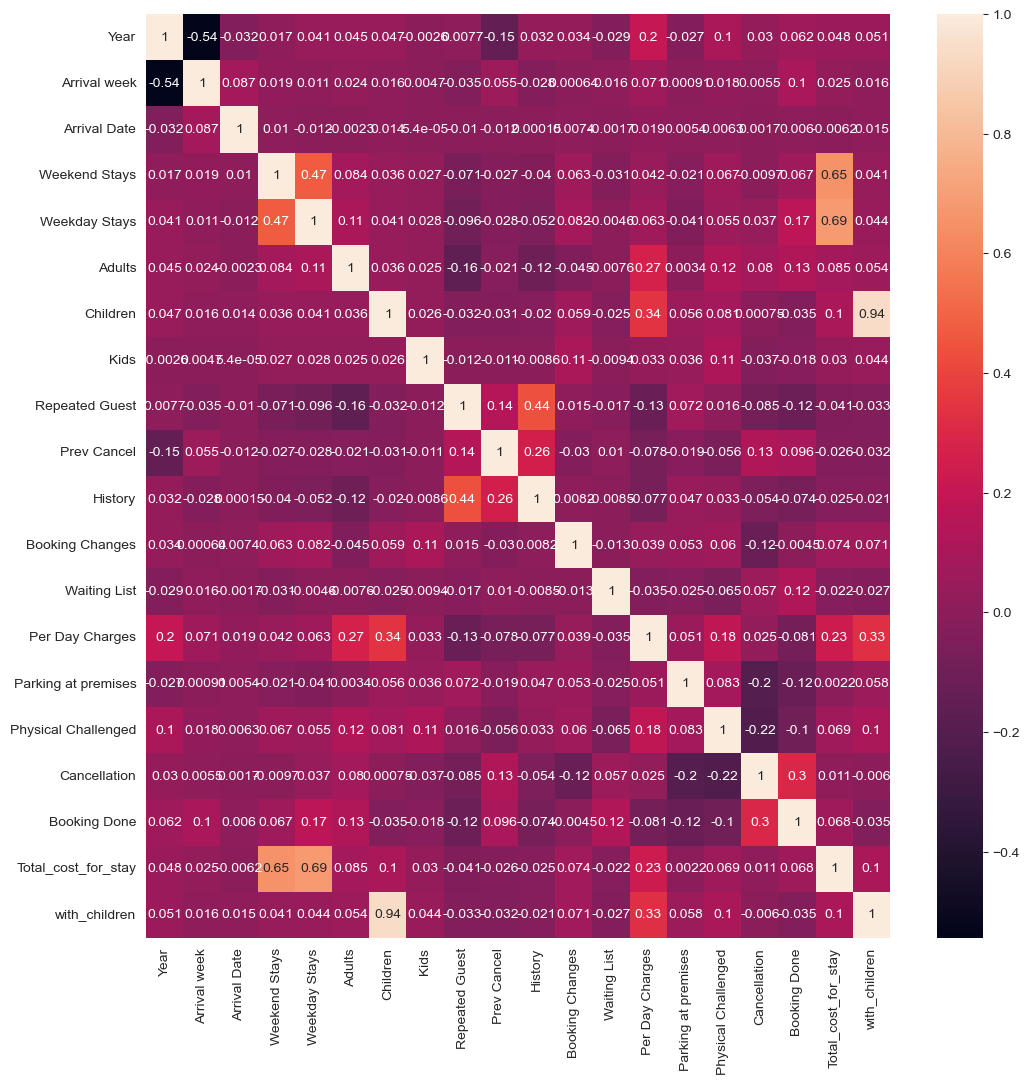

In [40]:
corr = df.corr(numeric_only = True)
plt.figure(figsize =(12,12))
sns.heatmap(corr, annot = True)
plt.show()